0    1.000000
1    0.412463
2    0.204748
Name: emulator, dtype: float64


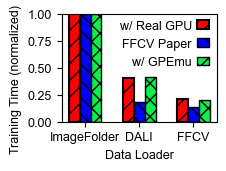

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=9
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()

columns = ['loader', 'emulator', 'gpu', 'paper']

# ssd, 24 workers, 8 v100
# df = pd.read_csv('ffcv.csv.dali', sep='\t', names=columns)
df = pd.read_csv('ffcv.csv.dali', sep='\t', names=columns)

def norm(values):
	base = float(values[-1])
	values = [float(x)/base for x in values]
	return values

emulated_values = df['emulator']
gpu_values = df['gpu']
paper_values = df['paper']
categories = df['loader'].tolist()

emulated_values = emulated_values / emulated_values[0]
gpu_values = gpu_values / gpu_values[0]
paper_values = paper_values / paper_values[0]

num_subcategories = 3
bar_width = 0.2
index = np.arange(len(categories))

# Plotting the bar chart
print(emulated_values)
plt.bar(index + 0 * bar_width, gpu_values, bar_width, label='w/ Real GPU', color='red', hatch="//", edgecolor="black", lw=1.5)
plt.bar(index + 1 * bar_width, paper_values, bar_width, label='FFCV Paper', color='blue', hatch="\\\\", edgecolor="black")
plt.bar(index + 2 * bar_width, emulated_values, bar_width, label='w/ GPEmu', color='#0BEF48', hatch="xx", edgecolor="black")


plt.ylim(0,1.0)
# Adding labels and title
plt.xticks(index + (bar_width * num_subcategories - 0.2) / 2, categories, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Data Loader', fontsize=fontsize)
plt.ylabel('Training Time (normalized)', fontsize=fontsize, y=0.4)
# title = plt.title('Training Time per Epoch\nw/ Varied Data Loaders',fontsize=fontsize, pad=9)
# title.set_position((0.4, 0))

fig.set_size_inches(2, 1.4)
fig.set_dpi(100)
plt.legend(fontsize=fontsize, frameon=False, handlelength=1, markerfirst=False, handletextpad=0.4,bbox_to_anchor=(0.3, 0.39))
plt.savefig('ffcv.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()

In [24]:
paper_values

0    1350
1     250
Name: paper, dtype: int64